In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Shopping Mall Customer Segmentation Data .csv  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('Shopping Mall Customer Segmentation Data .csv')


In [5]:
df

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76
...,...,...,...,...,...
15074,a0504768-a85f-4930-ac24-55bc8e4fec9e,29,Female,97723,30
15075,a08c4e0e-d1fe-48e7-9366-aab11ae409cd,22,Male,73361,74
15076,0e87c25a-268c-401a-8ba1-7111dcde6f1a,18,Female,112337,48
15077,5f388cbe-3373-4e16-b743-38f508f2249f,26,Female,94312,5


In [6]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Annual Income,0
Spending Score,0


In [7]:
df.drop('Customer ID',axis=1,inplace=True)

In [8]:
df["Gender"].replace({"Male":1,"Female":0},inplace=True)

In [9]:
df.head()

,Age,Gender,Annual Income,Spending Score
0,30,1,151479,89
1,58,0,185088,95
2,62,0,70912,76
3,23,1,55460,57
4,24,1,153752,76


In [10]:
from sklearn.cluster import KMeans
x = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]

# Initialize the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)

# Add the cluster labels to the original dataframe
df['Customer_Segment'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


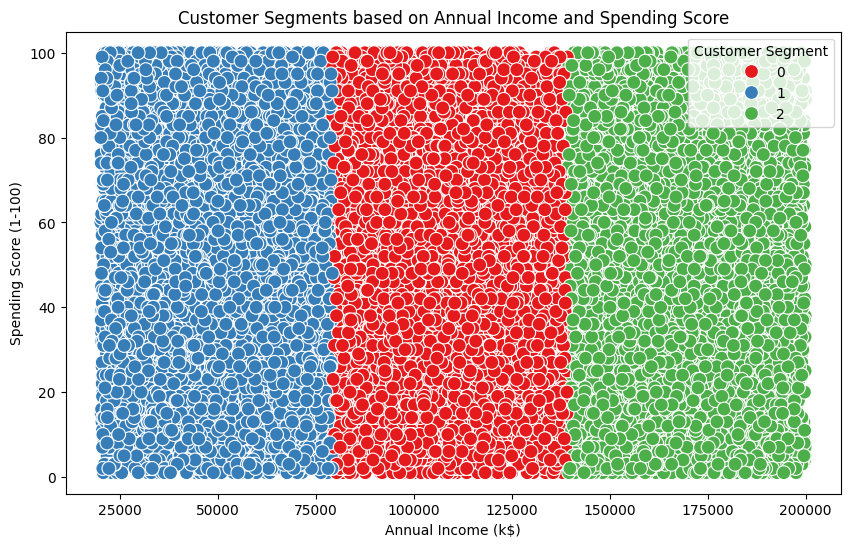

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income'], y=df['Spending Score'], hue=df['Customer_Segment'], palette='Set1', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Customer Segment')
plt.show()

In [12]:
df

,Age,Gender,Annual Income,Spending Score,Customer_Segment
0,30,1,151479,89,2
1,58,0,185088,95,2
2,62,0,70912,76,1
3,23,1,55460,57,1
4,24,1,153752,76,2
...,...,...,...,...,...
15074,29,0,97723,30,0
15075,22,1,73361,74,1
15076,18,0,112337,48,0
15077,26,0,94312,5,0


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Features (X) and target variable (y)
X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]  # Features
y = df['Customer_Segment']  # Target: Customer Segments from K-Means

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Check distribution of customer segments
print(df['Customer_Segment'].value_counts())

Customer_Segment
2    5118
1    5012
0    4949
Name: count, dtype: int64


In [17]:
# Initialize the decision tree model
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)


# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [18]:
# Make predictions on the test set
y_pred = dt_model.predict(X_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.98%


In [20]:
# Confusion matrix and classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1486
           1       1.00      1.00      1.00      1501
           2       1.00      1.00      1.00      1537

    accuracy                           1.00      4524
   macro avg       1.00      1.00      1.00      4524
weighted avg       1.00      1.00      1.00      4524



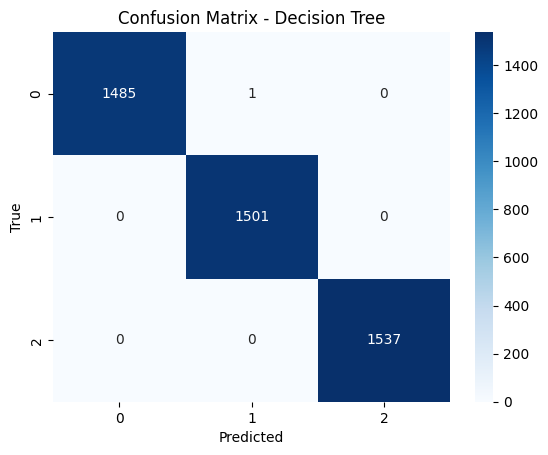

In [21]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [22]:
# Predict on new customer data
new_customer = [[23, 0, 55460, 100]]  # Example: Age, Gender, Annual Income, Spending Score
predicted_segment = dt_model.predict(new_customer)
print(f'Predicted Customer Segment for new customer: {predicted_segment[0]}')

Predicted Customer Segment for new customer: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
dt_model.predict(X.head(1))

array([2], dtype=int32)

In [24]:
dt_model.predict([[23, 0, 55460, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

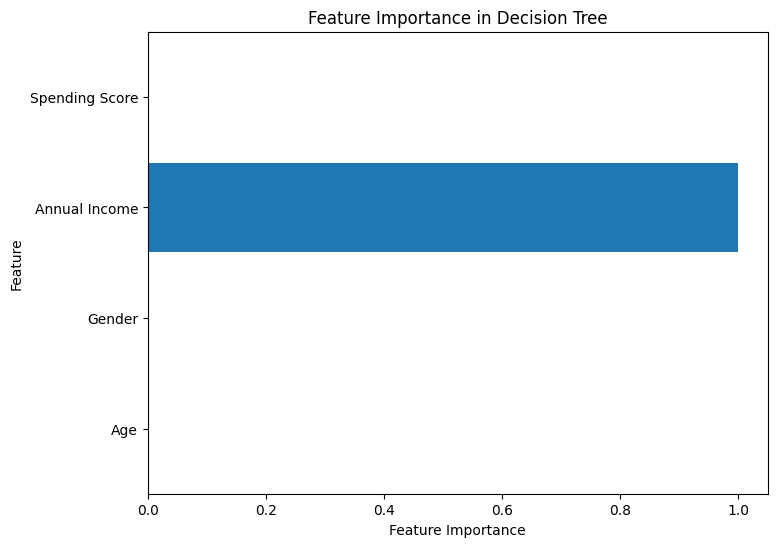

In [25]:
# Feature importance
import matplotlib.pyplot as plt
import numpy as np

feature_importances = dt_model.feature_importances_
features = ['Age', 'Gender', 'Annual Income', 'Spending Score']

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(np.arange(len(features)), feature_importances, align='center')
plt.yticks(np.arange(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.show()


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Gender', 'Annual Income', 'Spending Score']] = scaler.fit_transform(df[['Age', 'Gender', 'Annual Income', 'Spending Score']])

<Axes: >

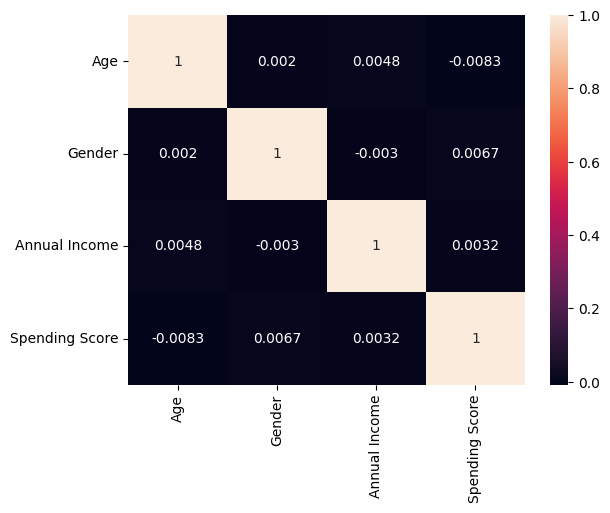

In [27]:
sns.heatmap(df[['Age', 'Gender', 'Annual Income', 'Spending Score']].corr(), annot=True)

In [28]:
from sklearn.ensemble import RandomForestClassifier

model2 =  RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [29]:
y_pred2 = model2.predict(X_test)

In [30]:
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy2 * 100:.2f}%')

Accuracy: 99.98%


In [31]:
import joblib

# Save the model
joblib.dump(dt_model, 'customer_segmentation_model.pkl')

['customer_segmentation_model.pkl']

In [32]:
joblib.dump(model2, 'customer_segmentation_model2.pkl')

['customer_segmentation_model2.pkl']

In [45]:
from sklearn import svm
model4 = svm.SVC()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print(f'Accuracy: {accuracy4 * 100:.2f}%')

Accuracy: 99.82%


In [46]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy3 * 100:.2f}%')

Accuracy: 72.10%


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Solvers
    'max_iter': [100, 500, 1000]  # Maximum iterations
}

grid_search = GridSearchCV(model3, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 100, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.99


In [43]:
# Train the model with the best parameters
best_log_reg = LogisticRegression(C=100, max_iter=500, penalty='l1', solver='liblinear')
best_log_reg.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_best = best_log_reg.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Test Accuracy: {accuracy_best * 100:.2f}%')


Test Accuracy: 98.12%


In [44]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1486
           1       1.00      1.00      1.00      1501
           2       1.00      1.00      1.00      1537

    accuracy                           1.00      4524
   macro avg       1.00      1.00      1.00      4524
weighted avg       1.00      1.00      1.00      4524



In [47]:
joblib.dump(best_log_reg, 'cust_seg_log_reg.pkl')

['cust_seg_log_reg.pkl']